# I. Introduction

Data is coming from: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers


Klasifikācijas uzdevums

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.__version__

'2.5.0'

# 2. Import a Data-Set


In [ ]:
churn_file_name = "/content/drive/MyDrive/Data analytics course/Churn_Modelling.csv"
churn_df = pd.read_csv(churn_file_name)
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#X
independant_var = churn_df.iloc[:, 3:-1].values #neieskaitīs pēdējo kolonnu

#y
dependant_var = churn_df.iloc[:, -1].values

In [ ]:
independant_var

In [ ]:
dependant_var

#3. Pre-processing

**a) Label Encoding**

We have different genders as text - we shall transform them into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
independant_var[:, 2] = le.fit_transform(independant_var[:, 2])


In [ ]:
independant_var

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

**b) One Hot Encoding**

*Geography* column has different names of countries. We shall transfor it into numerical values. Here One Hot Encoder will work good. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough")
independant_var = np.array(ct.fit_transform(independant_var))
independant_var

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

**c) Split of our Data-set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independant_var, dependant_var, test_size=0.2, random_state=0)

**d) Feature Scaling**

ANN requires all features to be scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

**e) Building ANN.**

*e.1) ANN Initialization*

In [ ]:
churn_ann = tf.keras.Sequential()

*e.2) Create Input and fisrt Hidden layers*


Since we have all Input nodes fully connected to first hidden layer - we will use Dense class from layers introduced in Keras.

In [ ]:
churn_ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

*e.3) Create next Hidden layer*


In [ ]:
churn_ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

*e.3) Create Output layers*

In [ ]:
churn_ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) #šeit ir klasifikācoka, tāpēc ir aktivācijas funkcija

# 4. Training of ANN Model

**a) Compile ANN**

https://keras.io/api/losses/

*Adam* is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

In [ ]:
churn_ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # savieno slāņu kopā; binary jo 2 klases

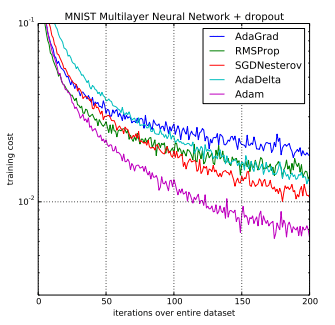

**a) Train ANN**

Batch learning is more efficient (memory-wise).

In [ ]:
churn_ann.fit(X_train, y_train, batch_size=32, epochs=100) #batch_size - atmiņas apjoms, parasti izmanto 32, epochs cik cikli iet modelim apmācībā

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6188 - accuracy: 0.7530
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.8001
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8074
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8173
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8220
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8259
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8294
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8338
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8393
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3773 - accura

**5. Validate ANN Result**

In [ ]:
y_pred = churn_ann.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)*100

In [ ]:
y_pred

array([[0.34215853],
       [0.3632055 ],
       [0.22456595],
       ...,
       [0.13249567],
       [0.13613737],
       [0.23687747]], dtype=float32)

In [ ]:
y_pred =  y_pred > 0.5 #, ja būs lielāks par 0.5, būs True

In [ ]:
accuracy_score(y_test, y_pred)*100

85.85000000000001